# *fepB* Fe2+-enterobactin ABC transporter substrate-binding protein

*FepB* protein sequences of the *Klebsiella* genius were downloaded on NCBI proteins with query: `(Klebsiella[Organism]) AND fepB[Gene Name]`

## First, analysis on only sequences from *Klebsiella pneumoniae* (Kp)

There are in total 5,246 Kp sequences.  
Among which, the majority of sequences (5141/5246) has length of 319 aa, and other 58 sequences have 305aa. For other sequence lengths differing from 319 and 305aa, there are only 1 or 2 sequences.

I then extracted the majority Kp sequences with length of 319 or 305aa (n=5199), and performed clustering with CD-HIT (v4.8.1). With the minimum identity threshold of 95%, the sequences were stratified into three clusters:
- Cluster 0 with 5197 sequences
- Cluster 1 with 1 sequence (accession number: SSH78996.1)
- Cluster 2 with 1 sequence (accession number: SSW76018.1)

On Seaview, the two sequences of Cluster 1 & 2 are very different from the representative sequence Cluster 0.

#### Conclusion 0: *fepB* protein sequence is conserved among *Klebsiella pneumoniae*.

## Second, access the similarity of conserved Kp sequence with *E. coli fepB*

I took the representative sequence of Cluster 0 (length = 319aa, accession number: WHQ89995.1) and BLASTP on NCBI.  
The result shows that there are only 2 *E. coli* sequences matched with >95% identity, but both of them are 305aa long (95% coverage)



#### Conclusion 1: conserved Kp sequence is divergent from *E. coli*.

## Third, access the similarity between Kp and *Klebsiella* non-Kp sequences

I created a set of:
- the majority Kp sequences with length of 319 or 305aa (n=5199), like above
- sequences of other *Klebsiella* species

then performed clustering with CD-HIT and minimum identity threshold of 95%.

See below for the results.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
font = {'family': 'sans-serif', 'serif': 'Helvetica',
        'size': 14}
plt.rc('font', **font)
legnd = {'fontsize': 20, 'handlelength': 1.5}
plt.rc('legend', **legnd)

In [ ]:
klebs_refined_cdhit95 = pd.read_csv("fepB.Klebs.defined_sp.cdhit95.tsv", sep="\t")
klebs_refined_cdhit95.head()

There are 13 clusters in total.  
The table below shows the number of sequences of different *Klebsiella* species in each cluster.

In [3]:
clstr_sp_count = klebs_refined_cdhit95.groupby(["cdhit_cluster", "species"])[['accession_number']].count()
clstr_sp_count

accession_number
cdhit_cluster species                                     
Cluster 0     Klebsiella oxytoca                         1
Cluster 1     Klebsiella grimontii                      42
              Klebsiella michiganensis                  93
              Klebsiella oxytoca                        52
              Klebsiella pasteurii                      17
              Klebsiella spallanzanii                    4
Cluster 10    Klebsiella pneumoniae                      1
Cluster 11    Klebsiella oxytoca                         1
Cluster 12    Klebsiella aerogenes                       2
Cluster 2     Klebsiella indica                          1
              Klebsiella oxytoca                         1
Cluster 3     Klebsiella aerogenes                       3
              Klebsiella africana                        6
              Klebsiella pneumoniae                   5197
              Klebsiella quasipneumoniae               285
              Klebsiella quasivariicola                 18
              Klebsiella variicola                     216
Cluster 4     Klebsiella aerogenes                      99
Cluster 5     Klebsiella huaxiensis                      5
              Klebsiella oxytoca                         1
              Klebsiella spallanzanii                    2
Cluster 6     Klebsiella oxytoca                        26
Cluster 7     Klebsiella oxytoca                         2
Cluster 8     Klebsiella indica                          1
Cluster 9     Klebsiella pneumoniae                      1

In [ ]:
clstr_sp_count_mat = pd.pivot(clstr_sp_count.reset_index(), index="cdhit_cluster", columns="species", values=["accession_number"])
clstr_sp_count_mat.columns = clstr_sp_count_mat.columns.droplevel(level=0)

clstr_sp_percent_mat = clstr_sp_count_mat.apply(lambda x: x/x.sum()*100, axis=0)
clstr_sp_count_mat

Only five clusters have more than 2 sequences.  
The heatmap below shows the distribution of different species across those clusters:
- The color of each cell tells the % of sequences of a specific species stratified into the corresponding cluster. For instance, almost all Kp sequences are in Cluster 3, which is in line with the result from the clustering of Kp-only sequences.
- The number labeled on each cell tells the exact number of sequences.

In [5]:
sig_clstr = (clstr_sp_count_mat.sum(axis=1)>2).to_list()
clstr_sp_count_mat.index[sig_clstr]

Index(['Cluster 1', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'], dtype='object', name='cdhit_cluster')

In [12]:
fig, ax = plt.subplots(figsize=(13,4))
sns.heatmap(clstr_sp_percent_mat[sig_clstr], 
            vmin=0.00, vmax=100.00, cmap=sns.color_palette("ch:s=-.2,r=.5", as_cmap=True), 
            annot=clstr_sp_count_mat[sig_clstr], fmt=".0f", annot_kws={'fontsize': 13},
            linewidths=0.01,
            cbar=True, cbar_kws={'label': "% species sequences\nbelonging to a cluster"},
            ax=ax)

<AxesSubplot:xlabel='species', ylabel='cdhit_cluster'>

Cluster 3 is noteworthy, because it is exclusive for not only Kp, but also 4 other species: *K. quasipneumoniae*, *K. variicola*, *K. quasivariicola*, and *K. africana*.

A deeper look at this cluster, the figure below shows the distributions of identity (compared to the representative sequence WHQ89995.1 (Kp, 319aa)) and sequence length across different species within the cluster.

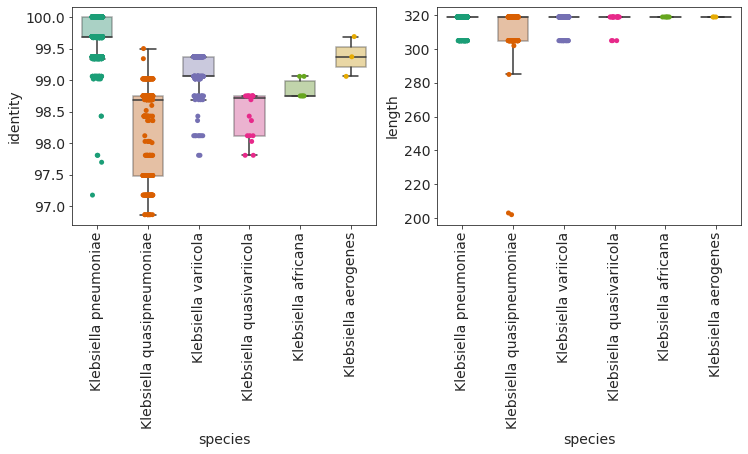

In [7]:
clstr3 = klebs_refined_cdhit95.loc[klebs_refined_cdhit95['cdhit_cluster']=="Cluster 3",:]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4))

sns.boxplot(data=clstr3, x="species", y="identity",
            palette="Dark2", width=0.6, boxprops={"alpha":0.4}, showfliers=False,
            ax=ax[0])
sns.stripplot(data=clstr3, x="species", y="identity",
             palette="Dark2", ax=ax[0])
ax[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=clstr3, x="species", y="length", 
            palette="Dark2", width=0.6, boxprops={"alpha":0.4}, showfliers=False, 
            ax=ax[1])
sns.stripplot(data=clstr3, x="species", y="length",
             palette="Dark2", ax=ax[1])
ax[1].tick_params(axis='x', rotation=90)

Within the same cluster 3, Kp sequences have higher identity values than sequences from other species. Sequences from different species cannot be differentiated by sequence length since most of them have the same length of 319aa.

#### Conclusion 2: conserved Kp sequence is slightly distinctive from other *Klebsiella* species.